## On the topic of list generation

### Types of Lists that will be needed
- Random
- Nearly sorted
- Reverse
- Heavy Duplicate
#### Edge cases
- Empty
- Single element
- Large Datasets

In [9]:
import json
import random
import heapq

random.seed(0)

# Creates a list of size len, returns unique random numbers
def random_list(len):
  arr = random.sample(range(0, 15000), len)
  return arr

# Creates a list where all elements are at most k positions away from correct pos
# Uses a min heap
def nearly_sorted_list(len, k):
  arr = random.sample(range(0, 15000), len)
  pq = []
  # Push first k elements
  for i in range(k):
    heapq.heappush(pq, arr[i])
  i = k
  index = 0
  while i < len:
    heapq.heappush(pq, arr[i])
    # Size becomes k+1, pop and add min element in index pos
    arr[index] = heapq.heappop(pq)
    i += 1
    index += 1

  # Put the rest of the elements in array
  while pq:
    arr[index] = heapq.heappop(pq)
    index += 1
  return arr

# Creates a reversely sorted list with unique numbers
def reverse_list(len):
  arr = random.sample(range(0, 15000), len)
  arr.sort()
  arr.reverse()
  return arr

# Creates a list of size len, includes logic for heavy duplicates
def heavy_duplicate_list(len):
  if len <= 10:
    arr = [random.randint(1, 3) for _ in range(len)]
  elif len <=  100:
    arr = [random.randint(1, 10) for _ in range(len)]
  elif len <= 1000:
    arr = [random.randint(1, 100) for _ in range(len)]
  else:
    arr = [random.randint(1,500) for _ in range(len)]
  return arr

x = random_list(10)
print(x)
x = heavy_duplicate_list(10)
print(x)
x = reverse_list(10)
print(x)
x = nearly_sorted_list(10, 2)
print(x)

[13835, 6311, 12418, 14585, 6890, 663, 4242, 8376, 7961, 6634]
[2, 2, 2, 3, 1, 3, 1, 2, 1, 1]
[14905, 14781, 13274, 13097, 11553, 10131, 9861, 8725, 4104, 2407]
[1618, 1208, 5081, 11957, 11206, 5409, 7735, 9171, 13934, 14726]


## About HeapSort

### Time complexity:
O(n log n)

### Auxiliary Space:
O(log n), due to recursive call stack

### Extra
- Is an in-place algorithm
- Typically 2-3 times slower than QuickSort
- On the topic of counting comparisons, bound comparisons are not counted though comparisons between array elements are counted

#### Credit
https://www.geeksforgeeks.org/dsa/heap-sort/


In [10]:
import time # track exec time
import random

# To heapify a subtree rooted with node i
def heapify(arr, n, i, metrics):
    # count the call
    metrics["recursive_calls"] += 1

    # Initialize largest as root
    largest = i

    # left index = 2*i + 1
    l = 2 * i + 1

    # right index = 2*i + 2
    r = 2 * i + 2

    # If left child is larger than root
    """
    if l < n and arr[l] > arr[largest]:
        largest = l
    """
    if l < n:
        metrics["comparisons"] += 1
        if arr[l] > arr[largest]:
            largest = l

    # If right child is larger than largest so far
    """
    if r < n and arr[r] > arr[largest]:
        largest = r
    """
    if r < n:
        metrics["comparisons"] += 1
        if arr[r] > arr[largest]:
            largest = r

    # If largest is not root (swap and recurse)
    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        metrics["swaps"] += 1

        # Recursively heapify the affected sub-tree
        heapify(arr, n, largest, metrics)

# Main function to do heap sort
def heapSort(arr):
    metrics = {
        "comparisons": 0,
        "swaps": 0,
        "recursive_calls": 0,
        "execution_time": 0
    }

    # Start the timer
    start_time = time.perf_counter()
    n = len(arr)

    # Build heap (rearrange vector)
    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i, metrics)

    # One by one extract an element from heap
    for i in range(n - 1, 0, -1):

        # Move current root to end
        arr[0], arr[i] = arr[i], arr[0]

        # Count it as a swap
        metrics["swaps"] += 1

        # Call max heapify on the reduced heap
        heapify(arr, i, 0, metrics)

    # End the timer
    end_time = time.perf_counter()
    metrics["execution_time"] = end_time - start_time

    return metrics

In [11]:
# Define a dict to store results
heap_results = {
    "random": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] },
    "nearly_sorted": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] },
    "reverse": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] },
    "heavy_duplicate": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [] }
}

if __name__ == "__main__":
  # Loop 6 times, list sizes in increments of 2500
  for i in range(6):

    # Create all lists
    rand_li = random_list((i + 1) * 2500)
    heavy_dupe_li = heavy_duplicate_list((i + 1) * 2500)
    rev_li = reverse_list((i + 1) * 2500)
    near_li = nearly_sorted_list((i + 1) * 2500, 2)

    # Run all lists through sorting algorithm

    # HeapSort, store in main metrics dict
    metrics = {
        "random": heapSort(rand_li),
        "nearly_sorted": heapSort(near_li),
        "reverse": heapSort(rev_li),
        "heavy_duplicate": heapSort(heavy_dupe_li)
    }

    # Push results from metrics dict to results dict
    for key in metrics:
      heap_results[key]["sizes"].append((i + 1) * 2500)
      heap_results[key]["comparisons"].append(metrics[key]["comparisons"])
      heap_results[key]["swaps"].append(metrics[key]["swaps"])
      heap_results[key]["recursive_calls"].append(metrics[key]["recursive_calls"])
      heap_results[key]["execution_time"].append(metrics[key]["execution_time"])


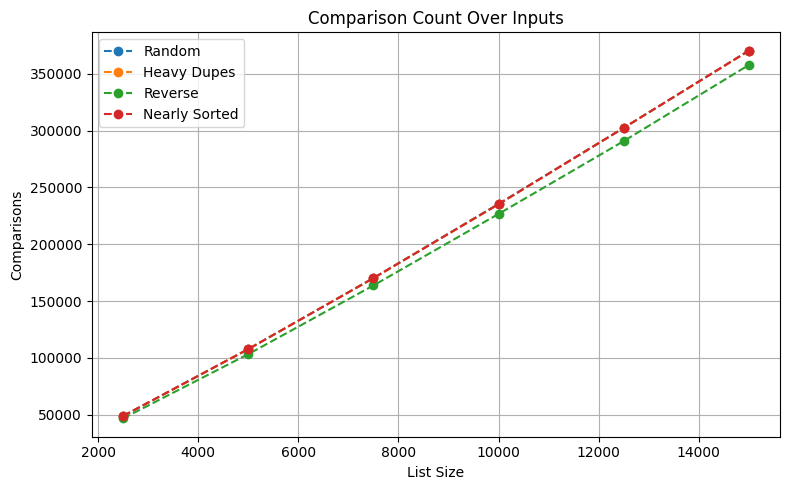

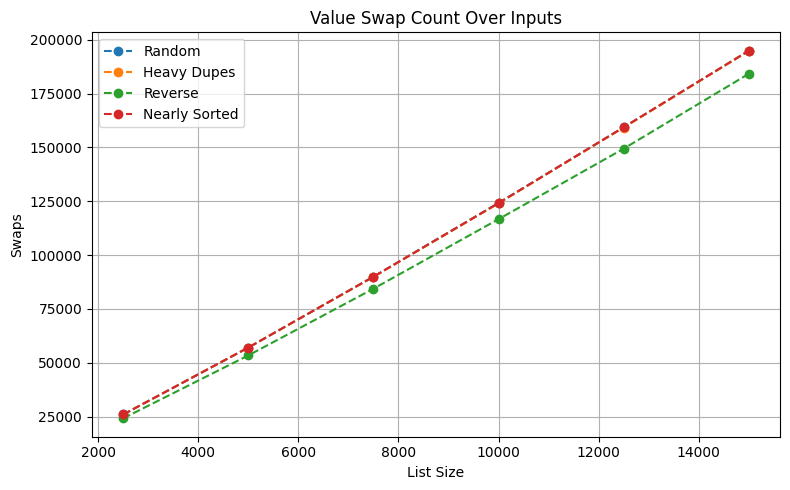

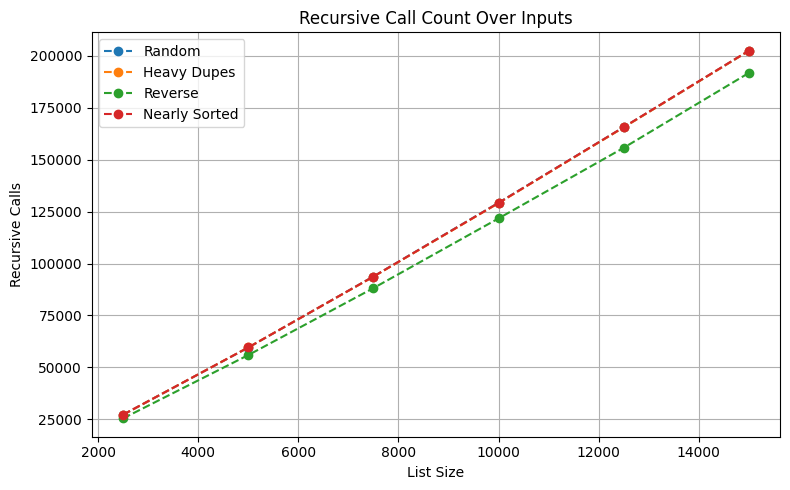

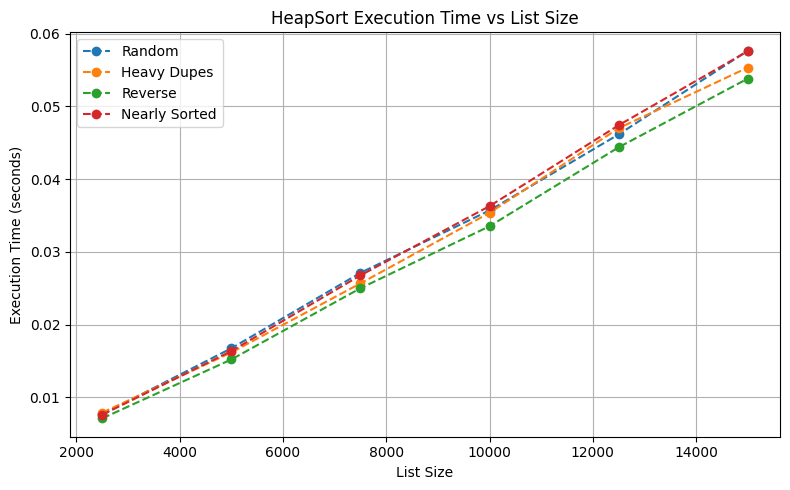

In [13]:
import matplotlib.pyplot as plt

# Map keys to legend names
list_types = {
    "random": "Random",
    "heavy_duplicate": "Heavy Dupes",
    "reverse": "Reverse",
    "nearly_sorted": "Nearly Sorted"
}

# Size x Comparisons
plt.figure(figsize=(8,5))   # Make sure graph big enough
# Loop through each list type and plot requested metric, assign label from list_types
for key, label in list_types.items():
    plt.plot(heap_results[key]["sizes"], heap_results[key]["comparisons"], label=label, marker="o", linestyle="--")

plt.title("Comparison Count Over Inputs")
plt.xlabel("List Size")
plt.ylabel("Comparisons")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Size x Swaps
plt.figure(figsize=(8,5))
for key, label in list_types.items():
    plt.plot(heap_results[key]["sizes"], heap_results[key]["swaps"], label=label, marker="o", linestyle="--")

plt.title("Value Swap Count Over Inputs")
plt.xlabel("List Size")
plt.ylabel("Swaps")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Size x Calls
plt.figure(figsize=(8,5))
for key, label in list_types.items():
    plt.plot(heap_results[key]["sizes"], heap_results[key]["recursive_calls"], label=label, marker="o", linestyle="--")

plt.title("Recursive Call Count Over Inputs")
plt.xlabel("List Size")
plt.ylabel("Recursive Calls")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Size x Time
plt.figure(figsize=(8,5))
for key, label in list_types.items():
    plt.plot(heap_results[key]["sizes"], heap_results[key]["execution_time"], label=label, marker="o", linestyle="--")

plt.title("HeapSort Execution Time vs List Size")
plt.xlabel("List Size")
plt.ylabel("Execution Time (seconds)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# About QuickSort
### Time complexity:

Best & Average Case - O(n log n)

Worst Case - O(n^2)

### Auxiliary Space:

Best & Average Case - O(log n)

Worst Case - O(n)

### Extra



*   Efficient on large data sets
*   Is a divide-and-conquer algorithm
*   Not a stable sort, which means that if two elements have the same key, their relative order will not be preserved in the sorted output

### Credit

https://www.geeksforgeeks.org/dsa/quick-sort-algorithm/

In [19]:
import time # track execution time
import random
import tracemalloc # track memory usage

# Global counters
"""
metrics = {
    "comparisons": 0,
    "swaps": 0,
    "recursive_calls": 0
}
comparisons = 0
swaps = 0
recursive_calls = 0
"""

# partition function
def partition(arr, low, high, metrics):
    #global comparisons

    # choose the pivot
    pivot = arr[high]

    # index of smaller element and indicates
    # the right position of pivot found so far
    i = low - 1

    # traverse arr[low..high] and move all smaller
    # elements to the left side. Elements from low to
    # i are smaller after every iteration
    for j in range(low, high):
        metrics["comparisons"] += 1
        if arr[j] < pivot:
            i += 1
            swap(arr, i, j, metrics)

    # move pivot after smaller elements and
    # return its position
    swap(arr, i + 1, high, metrics)
    return i + 1

# swap function
def swap(arr, i, j, metrics):
    #global swaps
    arr[i], arr[j] = arr[j], arr[i]
    metrics["swaps"] += 1

# the QuickSort function implementation
def quickSort(arr, low, high, metrics):
    #global recursive_calls
    metrics["recursive_calls"] += 1

    if low < high:

        # pi is the partition return index of pivot
        pi = partition(arr, low, high, metrics)

        # recursion calls for smaller elements
        # and greater or equals elements
        quickSort(arr, low, pi - 1, metrics)
        quickSort(arr, pi + 1, high, metrics)


# Metrics wrapper
def quickSort_tracked(arr):
    metrics = {
        "comparisons": 0,
        "swaps": 0,
        "recursive_calls": 0,
        "execution_time": 0,
        "current_memory": 0,
        "peak_memory": 0
    }

    tracemalloc.start() # Start mem-use tracker
    start_time = time.perf_counter() # Start exec timer
    quickSort(arr, 0, len(arr) - 1, metrics)
    end_time = time.perf_counter() # End exec timer
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop() # End mem-use tracker

    metrics["execution_time"] = end_time - start_time
    metrics["current_memory"] = current / 1024
    metrics["peak_memory"] = peak / 1024

    return metrics
    

if __name__ == "__main__":

    

    """
    # arr = [42, 7, 18, 93, 2, 56, 11, 74, 29, 5] # Random list
    # arr = [1, 2, 3, 4, 6, 5, 7, 8, 10, 9] # Nearly sorted list
    # arr = [10, 9, 8, 7, 6, 5, 4, 3, 2, 1] # Reverse sorted list
    # arr = [5, 5, 5, 3, 3, 7, 7, 5, 3, 7] # Heavy duplicate list

    # Large dataset
    size = 15000
    arr = [random.randint(0, 15000) for _ in range(size)]

    n = len(arr)
    #print("Unsorted: ", arr)

    tracemalloc.start() # Start mem-use tracker
    start_time = time.perf_counter() # Start exec timer
    quickSort(arr, 0, n - 1)
    end_time = time.perf_counter() # End exec timer
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop() # End mem-use tracker

    # Print statistics
    #print("Sorted: ", arr)
    print(f"Comparisons: ", comparisons)
    print(f"Swaps: ", swaps)
    print(f"Recursive calls: ", recursive_calls)
    print(f"Execution time: {end_time - start_time:.8f} seconds")
    print(f"Current memory usage: {current / 1024:.2f} KB")
    print(f"Peak memory usage: {peak / 1024:.2f} KB")
    """

In [ ]:
# QuickSort hates the reversed list
import sys
sys.setrecursionlimit(20000)

# Define a dict to store results
quick_results = {
    "random": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [], "current_memory": [], "peak_memory": [] },
    "nearly_sorted": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [], "current_memory": [], "peak_memory": [] },
    "reverse": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [], "current_memory": [], "peak_memory": [] },
    "heavy_duplicate": { "sizes": [], "comparisons": [], "swaps": [], "recursive_calls": [], "execution_time": [], "current_memory": [], "peak_memory": [] }
}

if __name__ == "__main__":
  # Loop 6 times, list sizes in increments of 2500
  for i in range(6):

    # Create all lists
    rand_li = random_list((i + 1) * 2500)
    heavy_dupe_li = heavy_duplicate_list((i + 1) * 2500)
    rev_li = reverse_list((i + 1) * 2500)
    near_li = nearly_sorted_list((i + 1) * 2500, 2)

    # Run all lists through sorting algorithm

    # HeapSort, store in main metrics dict
    metrics = {
        "random": quickSort_tracked(rand_li),
        "nearly_sorted": quickSort_tracked(near_li),
        "reverse": quickSort_tracked(rev_li),
        "heavy_duplicate": quickSort_tracked(heavy_dupe_li)
    }

    # Push results from metrics dict to results dict
    for key in metrics:
      quick_results[key]["sizes"].append((i + 1) * 2500)
      quick_results[key]["comparisons"].append(metrics[key]["comparisons"])
      quick_results[key]["swaps"].append(metrics[key]["swaps"])
      quick_results[key]["recursive_calls"].append(metrics[key]["recursive_calls"])
      quick_results[key]["execution_time"].append(metrics[key]["execution_time"])


## About MergeSort

### Time complexity:
O(n log n) for best, average, and worst cases

### Auxiliary Space:
O(n), due to creating extra arrays during merging

### Extra
- Not an in-place algorithm
- Stable sorting algorithm (keeps equal elements in order)
- Performance stays consistent even on bad or already-sorted inputs
- Uses the divide-and-conquer approach (split, sort, then merge)

#### Credit
https://www.geeksforgeeks.org/merge-sort/


In [ ]:
import time

# merge two lists
def merge(left, right, m):
    res = []
    i = 0
    j = 0

    while i < len(left) and j < len(right):
        m["comparisons"] += 1

        if left[i] <= right[j]:
            res.append(left[i])
            i += 1
        else:
            res.append(right[j])
            j += 1

    # leftovers
    res.extend(left[i:])
    res.extend(right[j:])
    return res

# merge sort recursion
def merge_sort(arr, m):
    m["recursive_calls"] += 1

    if len(arr) <= 1:
        return arr

    mid = len(arr)//2
    left = merge_sort(arr[:mid], m)
    right = merge_sort(arr[mid:], m)

    return merge(left, right, m)

# tracks metrics + timing
def run_merge_sort(arr):
    m = {
        "comparisons": 0,
        "swaps": 0,   # merge sort never swaps, included to match group style
        "recursive_calls": 0,
        "execution_time": 0
    }

    start = time.perf_counter()
    out = merge_sort(arr, m)
    m["execution_time"] = time.perf_counter() - start

    return out, m

# prints metrics
def print_metrics(m):
    print("Comparisons:", m["comparisons"])
    print("Swaps:", m["swaps"])
    print("Recursive calls:", m["recursive_calls"])
    print(f"Execution time: {m['execution_time']:.8f} seconds")


# arr = [33, 12, 77, 5, 29, 41, 8, 64, 19, 2]  # Random list
# arr = [1, 2, 3, 4, 6, 5, 7, 8, 10, 9]  # Nearly sorted list
# arr = [20, 18, 16, 14, 12, 10, 8, 6, 4, 2]  # Reverse sorted list
# arr = [4, 4, 4, 3, 3, 7, 7, 7, 3, 4]  # Heavy duplicate list

# Default quick check
# arr = [12, 7, 25, 3, 18, 9, 31, 4, 22, 15, 1, 28]


# Run Merge Sort

print("Unsorted:", arr)
sorted_arr, m = run_merge_sort(arr)
print("Sorted:", sorted_arr)
print_metrics(m)


# Uncomment to test large dataset of size n

# size = 15000
# arr = [random.randint(0, 15000) for _ in range(size)]
# sorted_arr, metrics = run_merge_sort(arr)
# print("Comparisons:", metrics["comparisons"])
# print("Swaps:", metrics["swaps"])
# print("Recursive calls:", metrics["recursive_calls"])
# print(f"Execution time: {metrics['execution_time']:.8f} seconds")


Unsorted: [1, 1, 1, 3, 3, 5, 6, 7, 7, 12, 13, 13, 13, 14, 16, 17, 18, 18, 19, 20, 23, 26, 26, 26, 28, 28, 28, 32, 34, 35, 36, 38, 39, 39, 40, 42, 43, 43, 44, 46, 47, 50, 50, 50, 52, 52, 55, 56, 57, 57, 58, 58, 60, 63, 64, 64, 64, 65, 65, 68, 70, 73, 74, 75, 76, 77, 77, 79, 81, 82, 83, 84, 85, 85, 86, 86, 87, 87, 88, 89, 90, 90, 90, 90, 91, 91, 92, 93, 94, 97, 97, 99, 100, 104, 105, 105, 107, 110, 110, 111, 111, 112, 112, 112, 113, 113, 113, 115, 115, 116, 117, 118, 119, 122, 122, 122, 123, 123, 123, 126, 128, 129, 131, 131, 132, 133, 133, 134, 135, 135, 139, 140, 141, 141, 142, 143, 144, 144, 144, 144, 145, 147, 147, 147, 147, 147, 148, 149, 150, 150, 151, 151, 151, 152, 152, 154, 156, 156, 157, 157, 160, 160, 160, 160, 161, 163, 164, 165, 166, 166, 169, 171, 174, 174, 176, 176, 180, 182, 183, 186, 187, 187, 189, 190, 191, 191, 192, 193, 194, 195, 195, 196, 198, 198, 199, 199, 200, 202, 203, 204, 205, 205, 207, 207, 211, 211, 211, 212, 212, 212, 212, 213, 214, 214, 215, 216, 218, 219, 

**About Insertion**

Time Complexity:

best case: O(n)- when the list is already sorted

average:O(n^2)- regular random data

worst: O(n^2)- reverse sorted data

------------------------------------------
**Space Complexity:**
O(1)- in place sorting, minimalextra memory

------------------------------------------
**Stability:**
Stable- equal elements keep their original order

------------------------------------------
**Real world performance:**
- great on almost sorted or small datasets which is often faster than more advanced algorithms for small n

- good cache efficiency due to sequential memory access

- works as an online algorithm
- poor for large, highly unsorted data because of O(n^2) cost

------------------------------------------
**Efficiency under different input:**
- when sorted O(n), its fastest
- when almost sorted, its close to O(n) which is very efficient
- random O(n^2) is moderate for small data
- reverse sorted O(n^2) is when it is slowest

In [ ]:
import time
import random

# ---------------------------
# Insertion Sort
# ---------------------------
def insertion_sort(arr):
    a = arr[:]  # keep original intact
    for i in range(1, len(a)):
        key = a[i]
        j = i - 1
        while j >= 0 and a[j] > key:
            a[j + 1] = a[j]
            j -= 1
        a[j + 1] = key
    return a

# ---------------------------
# Timing helper
# ---------------------------
def measure(func, arr):
    start = time.time()
    sorted_arr = func(arr)
    end = time.time()
    return sorted_arr, end - start

# ---------------------------
# Generate datasets
# ---------------------------
def generate(n):
    unsorted_data = [random.randint(0, n) for _ in range(n)]
    sorted_data = sorted(unsorted_data)
    reversed_data = sorted_data[::-1]
    return unsorted_data, sorted_data, reversed_data

# ---------------------------
# Main
# ---------------------------
def run(n=2000):
    unsorted_data, sorted_data, reversed_data = generate(n)

    # Best case (sorted)
    _, best_time = measure(insertion_sort, sorted_data)

    # Average case (random)
    _, avg_time = measure(insertion_sort, unsorted_data)

    # Worst case (reverse)
    _, worst_time = measure(insertion_sort, reversed_data)

    print("\n=== INSERTION SORT METRICS ===")
    print(f"Unsorted (Random) Time:      {avg_time:.6f} s")
    print(f"Sorted (Best Case) Time:     {best_time:.6f} s")
    print(f"Reverse-Sorted (Worst) Time: {worst_time:.6f} s")
    print("==============================\n")

run()



=== INSERTION SORT METRICS ===
Unsorted (Random) Time:      0.051922 s
Sorted (Best Case) Time:     0.000129 s
Reverse-Sorted (Worst) Time: 0.097401 s



**About Selection**

Time complexity: Selection sort always performs the same number of comparisons, no matter how the data is arranged.

Best: O(n^2)- still scans full list to find minimum each iteration

Average: O(n^2)- comparisons always n(n-1)/2

Worst: O(n^2)- even reversed input still requires same comparisons

------------------------------------------
**Space complexity**:O(1)

Selection sort is an in place algorithm and only uses a few extra variables.

------------------------------------------

**Stability**: not stable because swapping the minimum element into place can move equal values out of order

------------------------------------------
**Real World Performance:**

Extremely predictable: all cases take nearly the same time, Very slow on large lists because O(n²).

Useful when Memory is very limited, You want to minimize swaps because selection sort performs only n–1 swaps

Not used in real-world systems for large sorting tasks because faster algorithms exist like merge sort, quicksort, heapsort.

------------------------------------------
**Efficiency under different Inputs:**

Best case- Sorted inout: still perfoms all comparisons so no improvement

Worst case- reverse sorted: almost identical runtime so O(n^2)

Average case- random input: O(n^2) is approximately equal to best and worst

------------------------------------------



In [ ]:
import time
import random

# -----------------------------
#   SELECTION SORT FUNCTION
# -----------------------------
def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        # Find the smallest element in remaining array
        for j in range(i + 1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        # Swap into correct position
        arr[i], arr[min_index] = arr[min_index], arr[i]
    return arr

# -----------------------------
#   TESTING FUNCTION
# -----------------------------
def test_selection_sort(size, data_type):
    # Generate different types of input
    if data_type == "sorted":
        arr = list(range(size))
    elif data_type == "reverse":
        arr = list(range(size, 0, -1))
    elif data_type == "random":
        arr = [random.randint(0, size) for _ in range(size)]
    else:
        raise ValueError("Choose: 'sorted', 'reverse', or 'random'")

    start = time.time()       # start timer
    selection_sort(arr)       # run sorting
    end = time.time()         # end timer

    return round(end - start, 6)

# -----------------------------
#   EXAMPLE USAGE
# -----------------------------
print("Testing Selection Sort on 5000 elements:")
print("Best case (sorted):     ", test_selection_sort(5000, "sorted"),  "seconds")
print("Worst case (reverse):   ", test_selection_sort(5000, "reverse"), "seconds")
print("Average case (random):  ", test_selection_sort(5000, "random"),  "seconds")


Testing Selection Sort on 5000 elements:
Best case (sorted):      0.269784 seconds
Worst case (reverse):    0.290431 seconds
Average case (random):   0.280529 seconds
